In [2]:
import sys

sys.path.insert(0, ".")
sys.path.append("../")  # import py files from parent folders/..*

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import pandas_ta as ta

## MACD

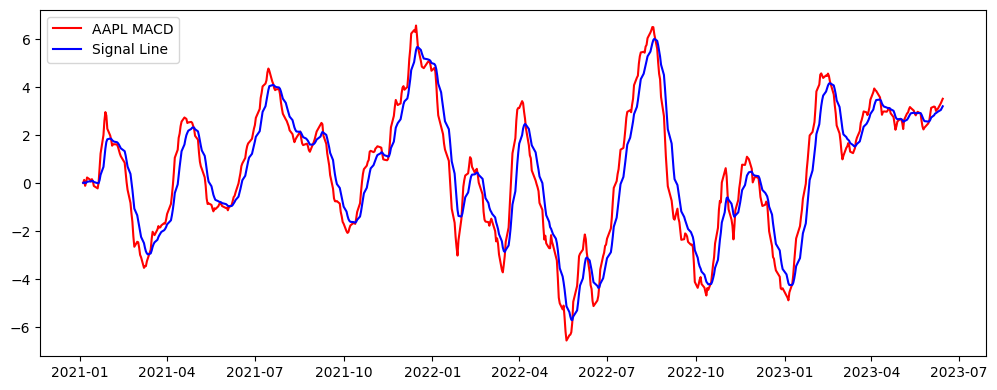

In [7]:
# Importing Required Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the Ticker Symbol
tickerSymbol = "AAPL"

# Get the data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for the specified period
tickerDf = tickerData.history(period="1d", start="2021-1-1", end="2023-6-15")

# Calculate MACD
# Short term EMA
ShortEMA = tickerDf.Close.ewm(span=12, adjust=False).mean()

# Long term EMA
LongEMA = tickerDf.Close.ewm(span=26, adjust=False).mean()

# Calculate MACD line
MACD = ShortEMA - LongEMA

# Calculate Signal Line
signal = MACD.ewm(span=9, adjust=False).mean()

# Add MACD and signal line to the data frame
tickerDf["MACD"] = MACD
tickerDf["Signal Line"] = signal

# Plot the chart
plt.figure(figsize=(12.2, 4.5))  # width = 12.2in, height = 4.5
plt.plot(tickerDf.index, MACD, label="AAPL MACD", color="red")
plt.plot(tickerDf.index, signal, label="Signal Line", color="blue")

plt.legend(loc="upper left")
plt.show()

## SMA

In [2]:
import pandas as pd
import yfinance as yf
import cufflinks as cf
import plotly.offline

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Define the Ticker Symbol
ticker_symbol = "GOOG"

# Get the data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Get the historical prices for the specified period
ticker_df = ticker_data.history(period="1d", start="2021-1-1", end="2023-6-15")

# Calculate Simple Moving Averages
ticker_df["SMA30"] = ticker_df["Close"].rolling(window=30).mean()
ticker_df["SMA100"] = ticker_df["Close"].rolling(window=100).mean()

# Define the data
data = [ticker_df["SMA30"], ticker_df["SMA100"], ticker_df["Close"]]

# Plot the chart
ticker_df.iplot(
    title="Moving Averages of " + tickerSymbol,
    xTitle="Date",
    yTitle="Price",
    theme="pearl",
)

## EMA

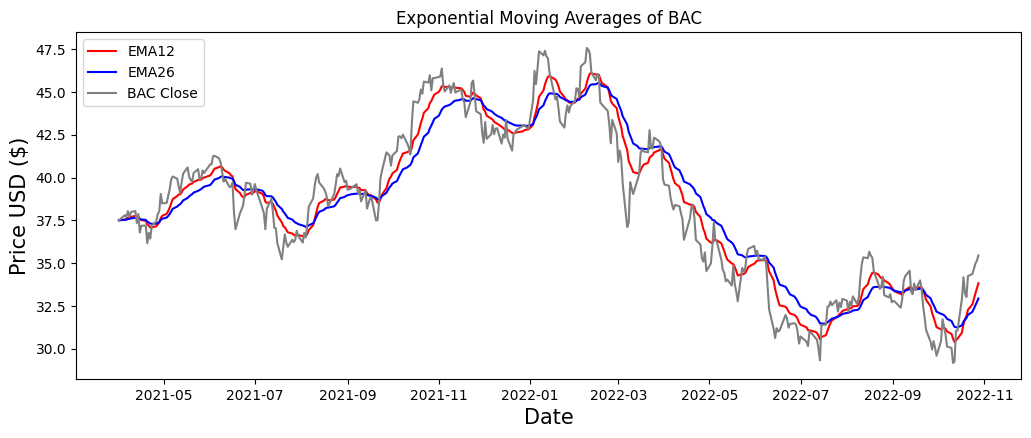

In [32]:
# Importing Required Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the Ticker Symbol
tickerSymbol = "BAC"

# Get the data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for the specified period
tickerDf = tickerData.history(period="1d", start="2021-4-1", end="2022-10-30")

# Calculate Exponential Moving Averages
tickerDf["EMA12"] = tickerDf["Close"].ewm(span=12, adjust=False).mean()
tickerDf["EMA26"] = tickerDf["Close"].ewm(span=26, adjust=False).mean()

# Plot the chart
plt.figure(figsize=(12.2, 4.5))  # width = 12.2in, height = 4.5
plt.plot(tickerDf.index, tickerDf["EMA12"], label="EMA12", color="red")
plt.plot(tickerDf.index, tickerDf["EMA26"], label="EMA26", color="blue")
plt.plot(tickerDf.index, tickerDf["Close"], label="BAC Close", color="gray")

plt.title("Exponential Moving Averages of " + tickerSymbol)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Price USD ($)", fontsize=15)
plt.legend(loc="upper left")
plt.show()

## RSI

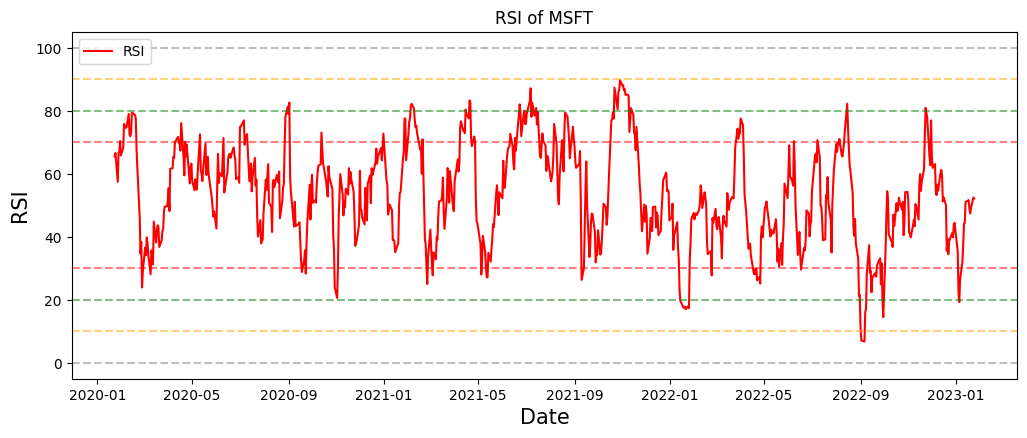

In [33]:
# Importing Required Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the Ticker Symbol
tickerSymbol = "MSFT"

# Get the data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for the specified period
tickerDf = tickerData.history(period="1d", start="2020-1-1", end="2023-1-25")

# Calculate RSI
delta = tickerDf["Close"].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()
up[up < 0] = 0
down[down > 0] = 0
average_gain = up.rolling(window=14).mean()
average_loss = abs(down.rolling(window=14).mean())
rs = average_gain / average_loss
RSI = 100.0 - (100.0 / (1.0 + rs))

# Add RSI to the data frame
tickerDf["RSI"] = RSI

# Plot the chart
plt.figure(figsize=(12.2, 4.5))  # width = 12.2in, height = 4.5
plt.plot(tickerDf.index, tickerDf["RSI"], label="RSI", color="red")
plt.axhline(0, linestyle="--", alpha=0.5, color="gray")
plt.axhline(10, linestyle="--", alpha=0.5, color="orange")
plt.axhline(20, linestyle="--", alpha=0.5, color="green")
plt.axhline(30, linestyle="--", alpha=0.5, color="red")
plt.axhline(70, linestyle="--", alpha=0.5, color="red")
plt.axhline(80, linestyle="--", alpha=0.5, color="green")
plt.axhline(90, linestyle="--", alpha=0.5, color="orange")
plt.axhline(100, linestyle="--", alpha=0.5, color="gray")
plt.title("RSI of " + tickerSymbol)
plt.xlabel("Date", fontsize=15)
plt.ylabel("RSI", fontsize=15)
plt.legend(loc="upper left")
plt.show()